## GRIP: The Spark Foundation

## By : Raja Sekhar Reddy

## Task 1:Prediction using Supervised ML

### In this regression task we will the predict the percentage of a student based on no of study hours.This Regression model involves two variables.

## Importing the Required Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Reading data from remote link

In [111]:
Dataset_url= "http://bit.ly/w-data"
df= pd.read_csv(Dataset_url)
print("Data imported successfully")

Data imported successfully


In [112]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [113]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [114]:
df.shape

(25, 2)

In [115]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

## Data Info

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Description of the Data

In [117]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Check whether null values present or not?

In [118]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Correlation 

In [119]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Average Score 

In [120]:
print("Average Score :",df["Scores"].mean())

Average Score : 51.48


## Average Hours

In [121]:
print("Average Hours :",df["Hours"].mean())

Average Hours : 5.012


## Data Visualization

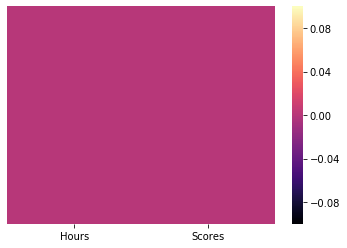

In [122]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="magma")

#### From the plot we found that there are no null values in the data.

### Scatter Plot between Two Numerical Variables "Hours" vs "Scores"

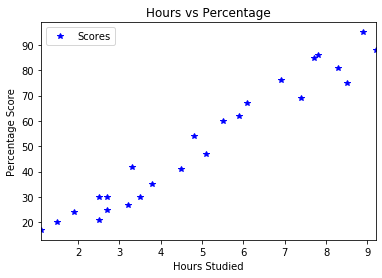

In [123]:
df.plot(x="Hours",y="Scores",style="*",color="blue")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the plot we observe that there is a postive linear relation between the no of hours studied and percentage of the score.As the no of hours studied increases then percentage of score increasing gradually.

## Regression Plot

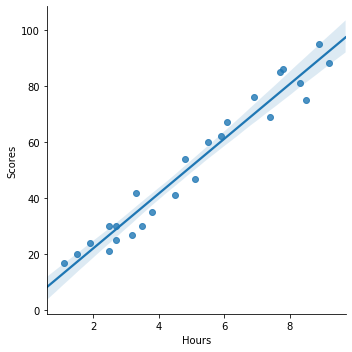

In [124]:
sns.lmplot(x="Hours",y="Scores",data=df)

## let us see the Correlation between the two varibales using Heatmap

Text(0.5, 1, 'Number of hours given by students for studies')

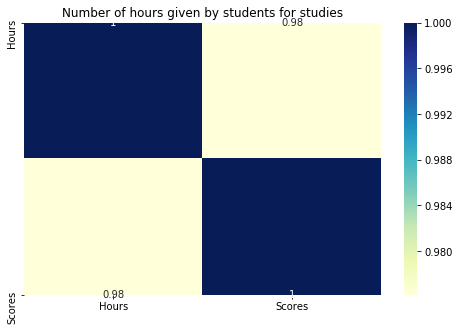

In [125]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
ax.set_title("Number of hours given by students for studies")

## Distribution plot to show the how student scores are distributed

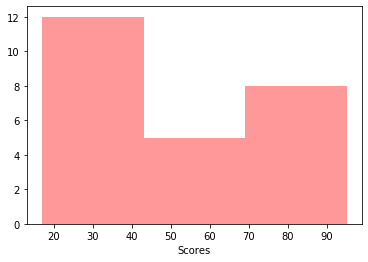

In [126]:
sns.distplot(df["Scores"],kde=False,color="red")

## Distribution of hours spend by students for their studies

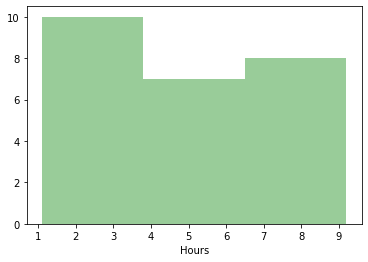

In [127]:
sns.distplot(df["Hours"],kde=False,color="green")

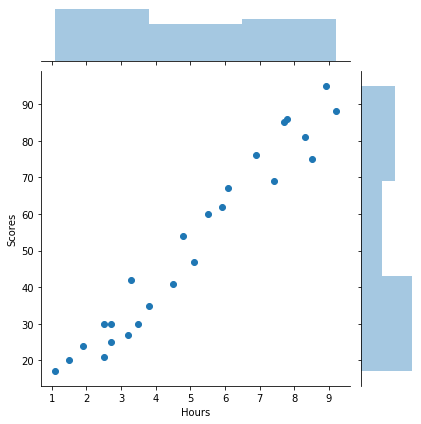

In [128]:
sns.jointplot(x="Hours",y="Scores",data=df,kind="scatter")

## Assigning values to the variables X and Y

In [129]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

## Splitting the Data into  "Train Set" and "Test Set"

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

## Showing the shape of the Train set and Test set

In [131]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (17, 1)
X_test : (8, 1)
y_train : (17,)
y_test : (8,)


## Training the Algorithm


### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [132]:
lr= LinearRegression()  
lr.fit(X_train, y_train) 
print("Training completed.")

Training completed.


## Let's make predictions on test data

In [133]:
y_pred=lr.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

## Visualising the model on train data

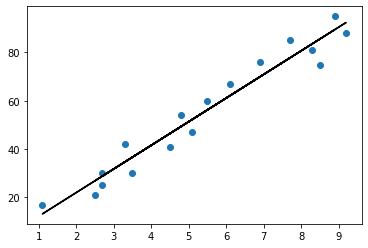

In [134]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color="black")
plt.show()

## Visualising the model on test data

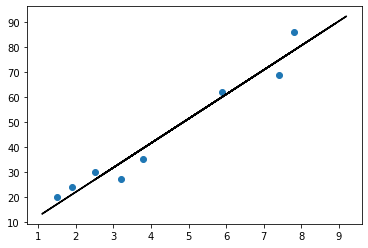

In [135]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="black")
plt.show()

## Training and Testing Scores

In [136]:
print("Traning Score :",lr.score(X_train,y_train))
print("Testing Score :",lr.score(X_test,y_test))

Traning Score : 0.9484997422695115
Testing Score : 0.9568211104435257


## Comparing Actual values and predicted values

In [137]:
pred_df=pd.DataFrame({"Actual": y_test,"predicted": y_pred})
pred_df

,Actual,predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


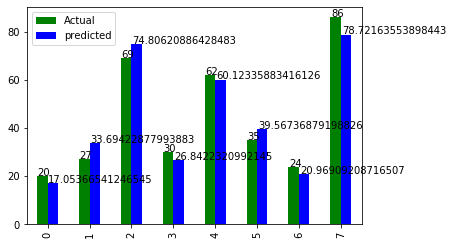

In [138]:
ax=pred_df.plot(kind='bar',color=['green','blue'])
for p in ax.patches:
     ax.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 10) 


## Predicting score for given hours

In [139]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("Score of the student who studied for 9.25 hours a day is = {}".format(own_pred[0]))

Score of the student who studied for 9.25 hours a day is = 92.91505723477056


## Evaluating the model

### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the Mean Absolute Error,R2_Score and Mean Squared Error.

In [140]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error" ,metrics.mean_squared_error(y_test,y_pred))
print("R2_score:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027652
Mean Squared Error 22.96509721270043
R2_score: 0.9568211104435257
